In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [2]:
salary = pd.read_csv("Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\saich\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

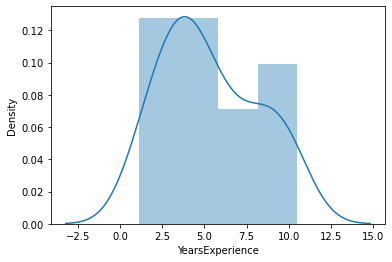

In [4]:
sns.distplot(salary['YearsExperience'])

C:\Users\saich\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

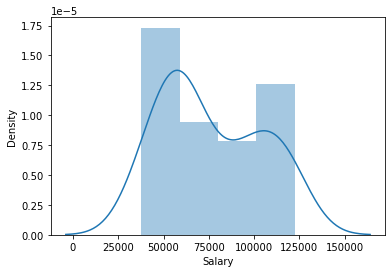

In [5]:
sns.distplot(salary['Salary'])

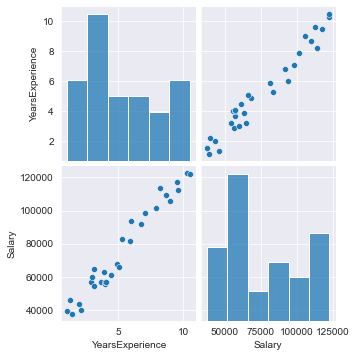

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(salary)

# Creating model

In [7]:
import statsmodels.formula.api as smf 
model=smf.ols("Salary~YearsExperience",data=salary).fit()

In [8]:
model.rsquared

0.9569566641435086

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        10:35:58   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [11]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [12]:
model.tvalues,model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

# Prediction

In [13]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [14]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [15]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [16]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

# By using log transformation

In [17]:
import numpy as np
salary1 = np.log(salary)
salary1

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


In [18]:
salary1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [19]:
salary1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.951428
Salary,0.951428,1.000000


In [20]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = salary1).fit()

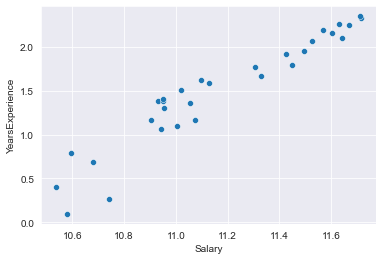

In [21]:
sns.scatterplot(x="Salary", y="YearsExperience", data=salary1);

In [22]:
model.params

Intercept          10.328043
YearsExperience     0.562089
dtype: float64

In [23]:
model.tvalues,model.pvalues

(Intercept          184.867959
 YearsExperience     16.352542
 dtype: float64,
 Intercept          9.073132e-45
 YearsExperience    7.395278e-16
 dtype: float64)

In [24]:
(model.rsquared,model.rsquared_adj)

(0.905215072581715, 0.9018298966024905)

# By using Cube Root Transformation

In [27]:
import numpy as np
salary2 = np.cbrt(salary)
salary2

,YearsExperience,Salary
0,1.032280,34.011242
1,1.091393,35.883626
2,1.144714,33.540235
3,1.259921,35.175984
4,1.300591,34.168426
5,1.426043,38.404271
6,1.442250,39.181273
7,1.473613,37.901174
8,1.473613,40.092494
9,1.546680,38.527500


In [28]:
salary2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [29]:
salary2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.965631
Salary,0.965631,1.000000


In [30]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = salary2).fit()

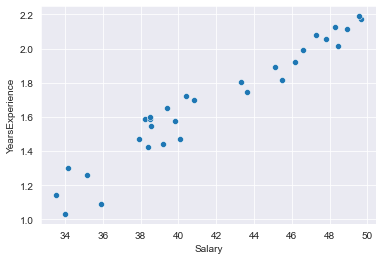

In [31]:
sns.scatterplot(x="Salary", y="YearsExperience", data=salary2);

In [32]:
model.params

Intercept          16.660277
YearsExperience    14.896252
dtype: float64

In [33]:
model.tvalues,model.pvalues

(Intercept          12.811402
 YearsExperience    19.658772
 dtype: float64,
 Intercept          3.133760e-13
 YearsExperience    6.367642e-18
 dtype: float64)

In [34]:
(model.rsquared,model.rsquared_adj)

(0.9324434036761005, 0.9300306680931041)

# By using Square root transformation

In [35]:
import numpy as np
salary3 = np.sqrt(salary)
salary3

,YearsExperience,Salary
0,1.048809,198.350700
1,1.140175,214.953483
2,1.224745,194.244691
3,1.414214,208.626460
4,1.483240,199.727314
5,1.702939,237.995798
6,1.732051,245.254969
7,1.788854,233.334524
8,1.788854,253.860198
9,1.923538,239.142217


In [36]:
salary3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [37]:
salary3.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.970541
Salary,0.970541,1.000000


In [38]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = salary3).fit()

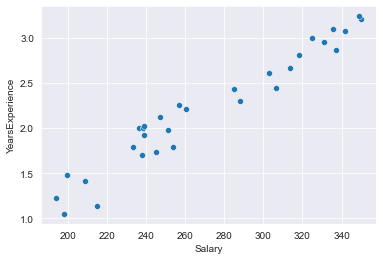

In [39]:
sns.scatterplot(x="Salary", y="YearsExperience", data=salary3);

In [40]:
model.params

Intercept          103.568031
YearsExperience     75.626932
dtype: float64

In [41]:
model.tvalues,model.pvalues

(Intercept          12.663496
 YearsExperience    21.315126
 dtype: float64,
 Intercept          4.141645e-13
 YearsExperience    7.584326e-19
 dtype: float64)

In [42]:
(model.rsquared,model.rsquared_adj)

(0.9419490138976825, 0.9398757643940283)